## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum() #First, check how many NaN values

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [8]:
bitstamp = bitstamp.dropna() #Use the dropna function to drop null values and reassign to bitstamp variable to save

In [9]:
bitstamp.isnull().sum() #After using the dropna function, confirm the amount of null values

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $ and replace with an open string
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

#double check to confirm the update with the dtypes function
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum() #use the duplicated and sum function, if returns 0 the data is good to go

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum() #First, check how many NaN values

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [14]:
coinbase = coinbase.dropna() #drop null values and assign back to coinbase to update

In [15]:
coinbase.isnull().sum() #Confirm that the null values were dropped

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [16]:
# Use the str.replace function to remove the dollar sign, $ and replace with an open string
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

In [17]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

#double check to confirm the update with the dtypes function
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [18]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum() #use the duplicated and sum function, if returns 0 the data is good to go

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"] #the timestamp is the index so it will show, but to get 'Close' we use the loc function with : to grab all the data

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"] #the timestamp is the index so it will show, but to get 'Close' we use the loc function with : to grab all the data

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe() #use the describe function

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [22]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe() #use the describe function

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Full Length'}, xlabel='Timestamp'>

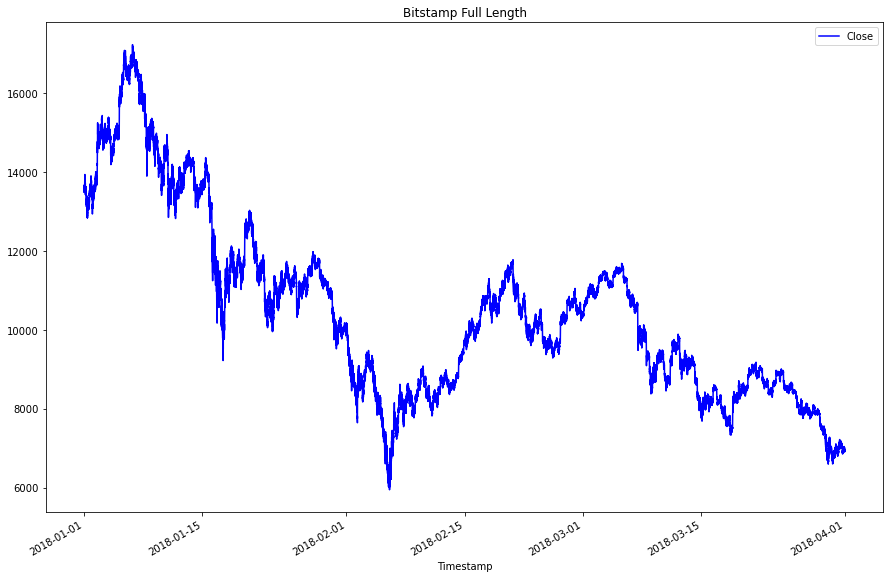

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp Full Length", color="blue") #use the bitstamp_sliced because focusing in on the close data
#use the plot fuction (will return a line plot as the default) with figure size parameters, adding a title, and making the color blue

<AxesSubplot:title={'center':'Coinbase Full Length'}, xlabel='Timestamp'>

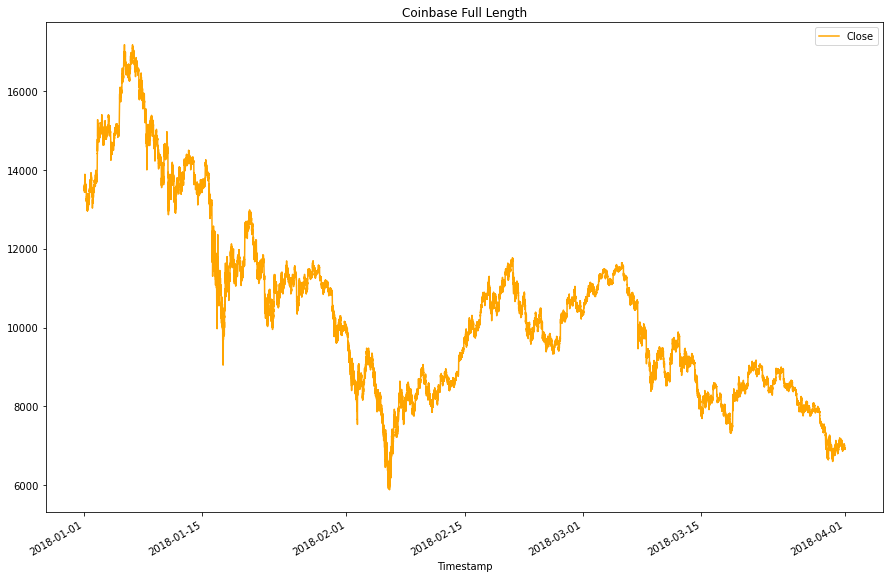

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="Coinbase Full Length", color="orange") #use coinbase_sliced because now focusing in on the close data only 
#use the plot fuction (will return a line plot as the default) with figure size parameters, adding a title, and making the color orange

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

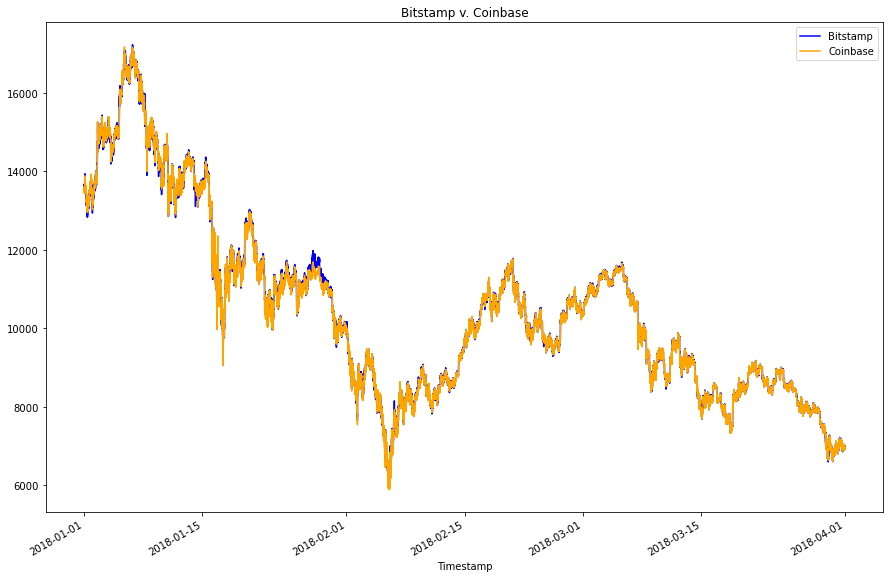

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp") #to overlay, use the legend=True, and then give the plot a title and label the specific data 
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

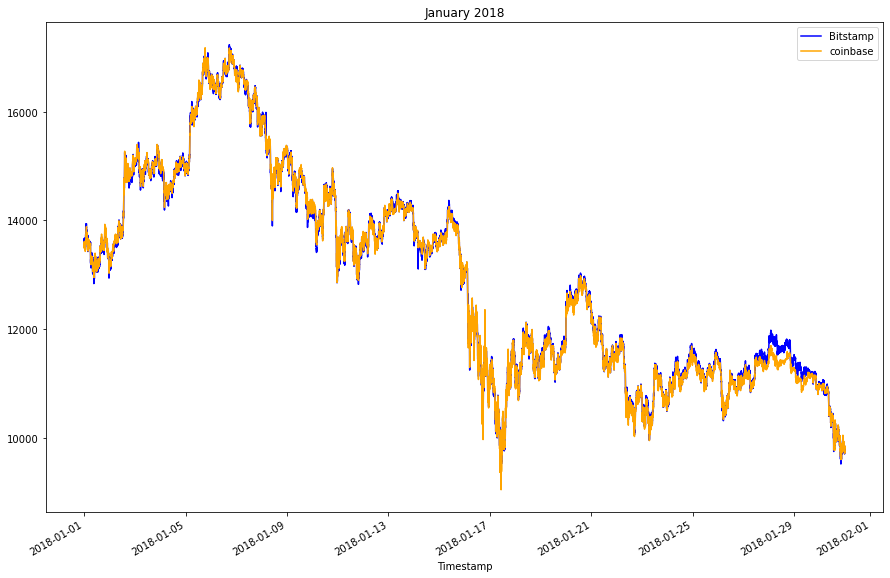

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes the price action of both DataFrames for a one month period early in the dataset
#Created to show January 2018 using legend, title, color, and label parameters
bitstamp_sliced.loc['2018-01-01' : '2018-01-30'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-01' : '2018-01-30'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

<AxesSubplot:title={'center':'February 2018'}, xlabel='Timestamp'>

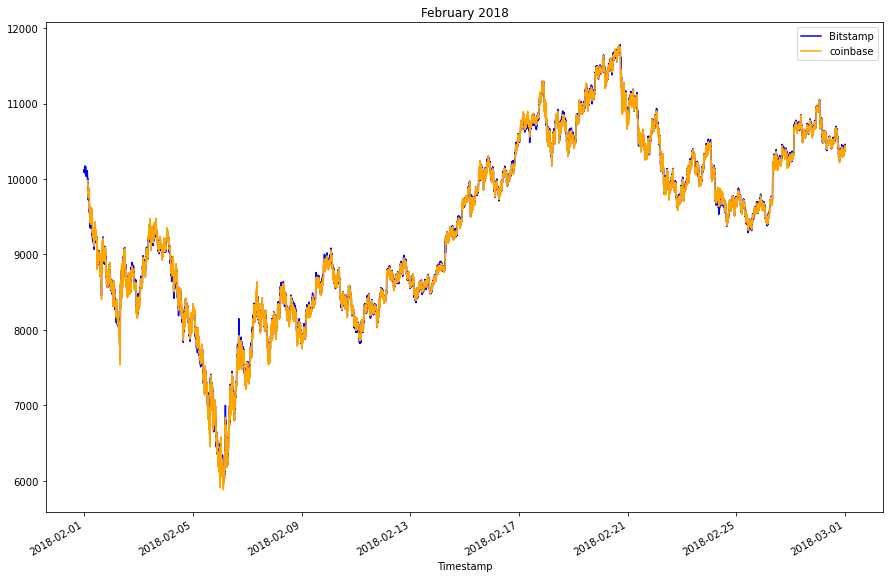

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes the price action of both DataFrames for a one month period later in the dataset
#Created to show February 2018 using legend, title, color, and label parameters

bitstamp_sliced.loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), title="February 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visualizations showing price differences during 2 months, the degree of spread has decreased from January to February.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 11, 2018'}, xlabel='Timestamp'>

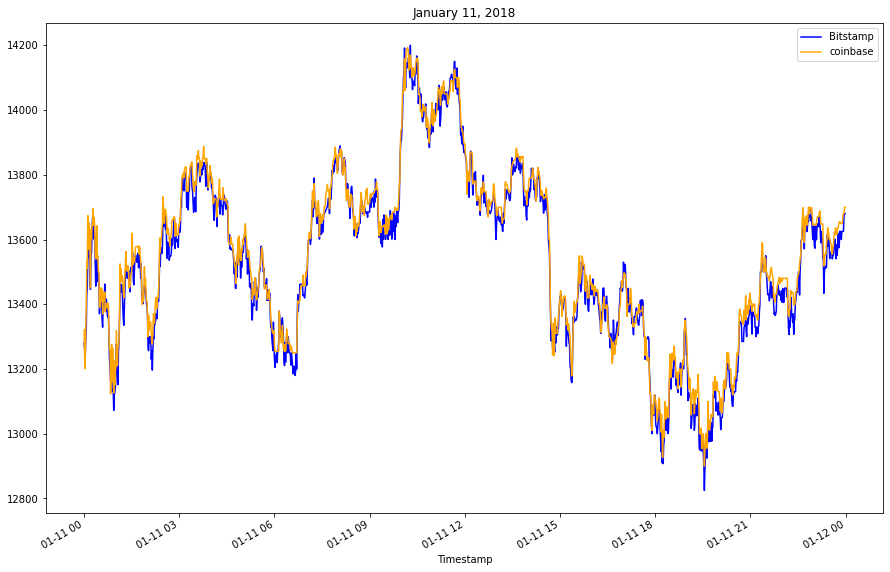

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
#Shows data from Jan 11 2018 using legend, title, color, and label parameters

bitstamp_sliced.loc['2018-01-11'].plot(
    legend=True, figsize=(15, 10), title="January 11, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-11'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [29]:
# Using the early date that you have selected, calculate the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-11'] - coinbase_sliced.loc['2018-01-11']

# Generate summary statistics for the early DataFrame using describe function
arbitrage_spread_early.describe()

count    1434.000000
mean      -23.019721
std        29.052228
min      -130.690000
25%       -41.502500
50%       -23.140000
75%        -3.767500
max        72.000000
Name: Close, dtype: float64

<AxesSubplot:>

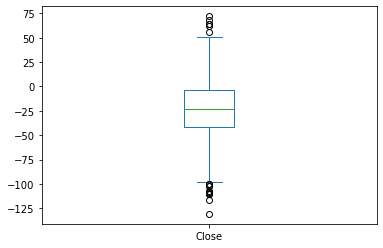

In [30]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'January 28, 2018'}, xlabel='Timestamp'>

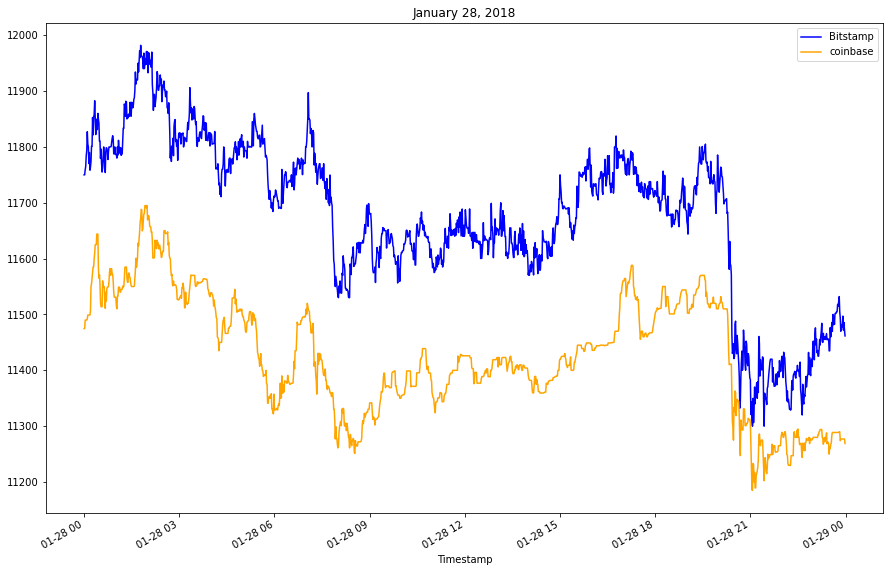

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-28'].plot(
    legend=True, figsize=(15, 10), title="January 28, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [32]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Generate summary statistics using describe function
arbitrage_spread_middle.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

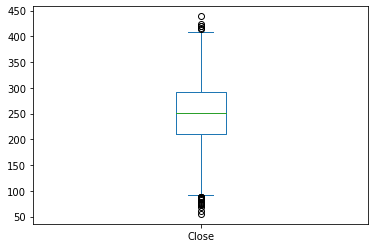

In [33]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'March 31, 2018'}, xlabel='Timestamp'>

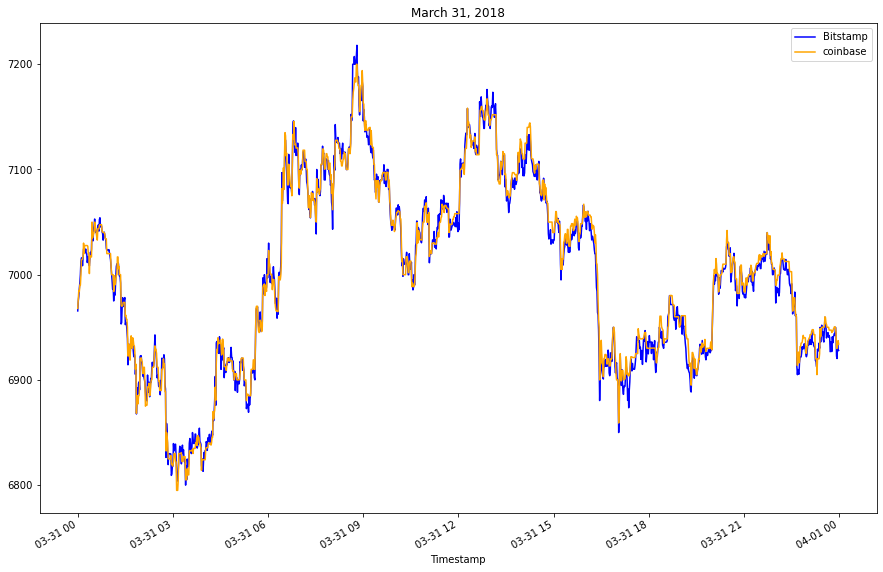

In [34]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="March 31, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [35]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-31'] - coinbase_sliced.loc['2018-03-31']

# Generate summary statistics for the late DataFrame using the describe function
arbitrage_spread_late.describe()

count    1434.000000
mean       -2.348675
std         8.109623
min       -35.980000
25%        -7.627500
50%        -2.300000
75%         2.537500
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:>

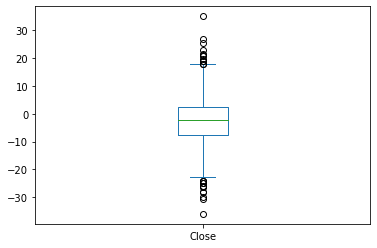

In [36]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [37]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-11'] - coinbase_sliced.loc['2018-01-11'] #shows spread for Jan 11
arbitrage_spread_middle = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28'] #shows spread for Jan 28
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-31'] - coinbase_sliced.loc['2018-03-31'] #shows spread for March 31

# Use a conditional statement to generate the summary statistics -using describe function- for each arbitrage_spread DataFrame where the spread is greater than 0
display(arbitrage_spread_early[arbitrage_spread_early>0].describe()) #use display to look at all 3 results
display(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
display(arbitrage_spread_late[arbitrage_spread_late>0].describe())

count    294.000000
mean      17.103980
std       14.124857
min        0.040000
25%        5.147500
50%       15.225000
75%       24.827500
max       72.000000
Name: Close, dtype: float64

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

count    514.000000
mean       5.905233
std        4.905227
min        0.010000
25%        2.042500
50%        4.820000
75%        8.777500
max       35.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-11'] #positive spread for mid Jan / price on bitstamp that day
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced.loc['2018-01-28'] #positive spread for late Jan / price on bitstamp that day
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-31'] #positive spread for late March / price on bitstamp that day

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True) #returned NaN values so drop them using dropna and inplace=True to return updated data
spread_return_middle.dropna(inplace=True) #returned NaN values so drop them using dropna and inplace=True to return updated data
spread_return_late.dropna(inplace=True) #returned NaN values so drop them using dropna and inplace=True to return updated data

display(spread_return_early, spread_return_middle, spread_return_late) #use display to review all three

Timestamp
2018-01-11 00:01:00    0.002112
2018-01-11 00:02:00    0.002353
2018-01-11 00:16:00    0.001213
2018-01-11 00:30:00    0.000472
2018-01-11 00:39:00    0.001891
                         ...   
2018-01-11 22:36:00    0.001245
2018-01-11 22:41:00    0.000628
2018-01-11 22:44:00    0.000827
2018-01-11 23:25:00    0.000981
2018-01-11 23:34:00    0.000523
Name: Close, Length: 294, dtype: float64

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1436, dtype: float64

Timestamp
2018-03-31 00:03:00    0.000428
2018-03-31 00:04:00    0.000352
2018-03-31 00:05:00    0.001426
2018-03-31 00:06:00    0.001810
2018-03-31 00:07:00    0.000312
                         ...   
2018-03-31 23:22:00    0.002160
2018-03-31 23:23:00    0.000723
2018-03-31 23:24:00    0.000165
2018-03-31 23:27:00    0.000286
2018-03-31 23:57:00    0.000117
Name: Close, Length: 514, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [39]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01] #To find profitable trades greater than 1% referencing spread return created above for Jan 11
profitable_trades_middle = spread_return_middle[spread_return_middle>.01] #To find profitable trades greater than 1% referencing spread return created above for Jan 28
profitable_trades_late = spread_return_late[spread_return_late>.01] #To find profitable trades greater than 1% referencing spread return created above for March 31

# Review the first five profitable trades
display(profitable_trades_early.head()) #Returns as nothing because there are no profitable trades for this date
display(profitable_trades_middle.head()) #Returns number of positive trades for this date
display(profitable_trades_late.head()) #Returns as nothing because there are no profitable trades for this date

Series([], Name: Close, dtype: float64)

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [40]:
# For the date early in the dataset, generate the summary statistics- using the describe function - for the profitable trades or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe()) #Returns as nothing because there are no profitable trades for this date
display(profitable_trades_middle.describe()) #Returns display for profitable trades
display(profitable_trades_late.describe()) #Returns as nothing because there are no profitable trades for this date

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    1377.000000
mean        0.021700
std         0.005179
min         0.010006
25%         0.018666
50%         0.021711
75%         0.024784
max         0.037082
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-11'] #Multiple profitable trades by the price on that day
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-01-28'] #Multiple profitable trades by the price on that day
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-31'] #Multiple profitable trades by the price on that day

#Use this code to drop any missing values from the profit DataFrame using dropna and inplace=True
profit_per_trade_early = profit_early.dropna() #drop using dropna and assign to new variable
profit_per_trade_middle = profit_middle.dropna() #drop using dropna and assign to new variable
profit_per_trade_late = profit_late.dropna()#drop using dropna and assign to new variable

# View the profit DataFrame
display(profit_per_trade_early, profit_per_trade_middle, profit_per_trade_late) #use display to see all three

#Early returns none because no profitable trades
#Middle retuns some profitable trades as shown below
#Late returns none because no profitable trades

Series([], Name: Close, dtype: float64)

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1377, dtype: float64

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [42]:
# Generate the summary statistics for the early profit per trade DataFrame using describe function
profit_per_trade_early.describe()
profit_per_trade_middle.describe()
profit_per_trade_late.describe()

display(profit_per_trade_early, profit_per_trade_middle, profit_per_trade_late)

#Early returns none because no profitable trades
#Middle retuns summary statistics for profitable trades
#Late returns none because no profitable trades

Series([], Name: Close, dtype: float64)

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1377, dtype: float64

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'January 28, 2018 Profit per Trade'}, xlabel='Timestamp'>

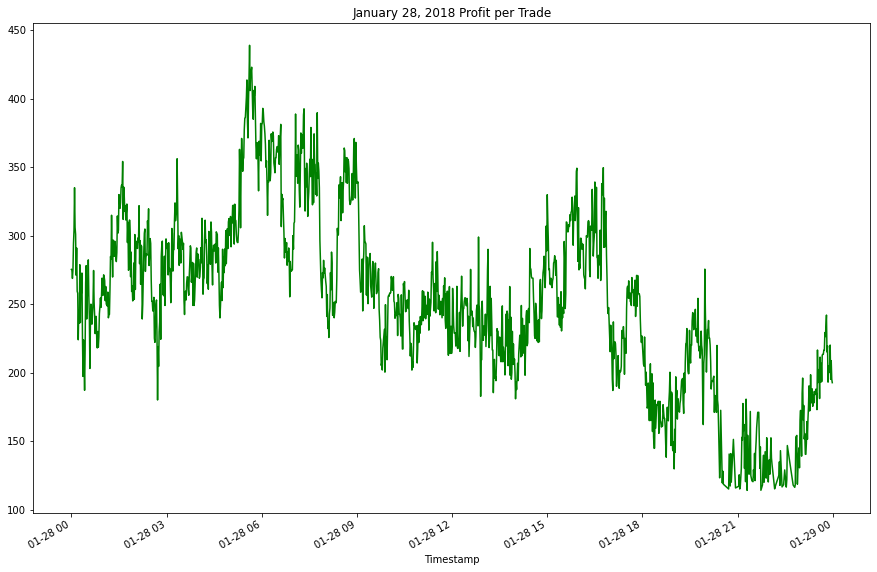

In [43]:
# Plot the results for the profit per trade DataFrame
profit_per_trade_early.plot() #will not plot because no data to reference
profit_per_trade_middle.plot(figsize=(15, 10), title="January 28, 2018 Profit per Trade", color="green")
profit_per_trade_late.plot() #will not plot because no data to reference

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [44]:
# Calculate the sum of the potential profits for the profit per trade DataFrame
# would run the following IF they had data to analyze, but with the dates chosen, they will return 0
# profit_per_trade_early.sum()
# profit_per_trade_late.sum()

#Focus in on the middle data set as it returns profits
profit_per_trade_middle.sum()

349803.8200000001

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [45]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
profit_per_trade_middle.cumsum()

#would run the same function for profit_per_trade_early and profit_per_trade_late if they contained profitable trades

Timestamp
2018-01-28 00:00:00       275.38
2018-01-28 00:01:00       550.38
2018-01-28 00:02:00       819.15
2018-01-28 00:03:00      1094.18
2018-01-28 00:04:00      1388.44
                         ...    
2018-01-28 23:55:00    349012.22
2018-01-28 23:56:00    349207.33
2018-01-28 23:57:00    349416.07
2018-01-28 23:58:00    349611.19
2018-01-28 23:59:00    349803.82
Name: Close, Length: 1377, dtype: float64

<AxesSubplot:title={'center':'January 28, 2018 Cumulative Profit Sum'}, xlabel='Timestamp'>

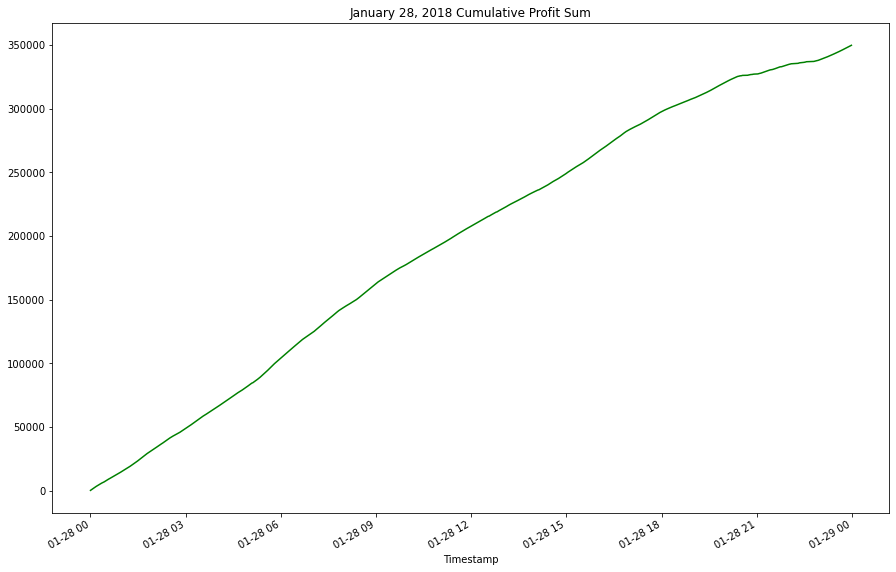

In [46]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
profit_per_trade_middle.cumsum().plot(figsize=(15, 10), title="January 28, 2018 Cumulative Profit Sum", color="green")

#would run the same function for profit_per_trade_early and profit_per_trade_late if they contained profitable trades

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Given that I can only analyze the profit information from January 28, it shows that there were not many arbitrage opportunities in this data set. In other words, in the first quarter of 2018, there were very few profitable arbitrage trades between the Bitstamp and Coinbase exchanges for Bitcoin. However, the pattern in this data shows that if there were any aribitrage opportunities, they were at the beginning of the period. With time, the plots show that the spread cointinues to decrease, meaning less opportunity for profitable trades. 